<a href="https://colab.research.google.com/github/GabeMaldonado/UoL_Study_Materials/blob/main/Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forests
## Instructions:

* Go through the notebook and complete the tasks. 
* Make sure you understand the examples given. If you need help, refer to the Essential readings or the documentation link provided, or go to the Topic 6 discussion forum. 
* Save your notebooks when you are done.
 
**Task 1:**
Run the code below to load the breast cancer diagnosis dataset. Use this data to train and test 1) a decision tree classifier, and then 2) a random forest classifier. Use the scikit-learn classes, ```DecisionTreeClassifier``` and ```RandomForestClassifier``` Compare and contrast the results using the relevant classifier evaluation methods in ```sklearn.metrics```.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics

# Load the breast cancer diagnosis dataset
breast_cancer = datasets.load_breast_cancer()
print(breast_cancer.DESCR)

X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [2]:
# create a Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt)
print(f"Test score: {dt.score(X_test, y_test)}")

# Predict on test data

y_dt_pred = dt.predict(X_test)
print(metrics.classification_report(y_test, y_dt_pred))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Test score: 0.9064327485380117
              precision    recall  f1-score   support

           0       0.80      0.94      0.86        54
           1       0.97      0.89      0.93       117

    accuracy                           0.91       171
   macro avg       0.88      0.92      0.90       171
weighted avg       0.92      0.91      0.91       171



In [3]:
rf = RandomForestClassifier(n_estimators=100, 
                                bootstrap=False)
rf.fit(X_train, y_train)
print(rf)
print('test score: %s' % rf.score(X_test, y_test) )

# Predict on the test data
y_rf = rf.predict(X_test)

# Evaluate the error using root mean square
print( metrics.classification_report(y_test, y_rf))

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
test score: 0.9415204678362573
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        54
           1       0.98      0.93      0.96       117

    accuracy                           0.94       171
   macro avg       0.92      0.95      0.93       171
weighted avg       0.95      0.94      0.94       171



## Evaluate feature importance
One of the useful things about Random Forests is that they provide a way to automatically evaluate the importance of how much each feature contributes towards the model performance. For more on the random forests ```feature_importance``` method in scikit-learn, see https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

**Task 2** Calculate and print a sorted list of all the features used above. Select the top 10 features,  then use these to train and test a new classifier, and evaluate the result.


In [4]:
# get features and weights
feature_importance = sorted(zip(rf.feature_importances_, feature_names), reverse=True) 

# print a sorted list ofmfeature importances
print("Importance \t feature name")
print("\n".join(["{} \t\t {}".format(round(i,3), f) for i, f in feature_importance]))

Importance 	 feature name
0.182 		 worst area
0.147 		 worst perimeter
0.109 		 worst radius
0.099 		 mean concave points
0.076 		 worst concave points
0.071 		 mean area
0.059 		 mean radius
0.038 		 mean perimeter
0.028 		 radius error
0.022 		 mean concavity
0.022 		 area error
0.021 		 worst concavity
0.019 		 worst texture
0.014 		 perimeter error
0.012 		 worst smoothness
0.011 		 mean texture
0.009 		 worst compactness
0.009 		 concavity error
0.007 		 mean compactness
0.006 		 mean smoothness
0.005 		 worst symmetry
0.005 		 worst fractal dimension
0.005 		 symmetry error
0.005 		 smoothness error
0.004 		 texture error
0.004 		 compactness error
0.004 		 mean symmetry
0.002 		 mean fractal dimension
0.002 		 concave points error
0.002 		 fractal dimension error


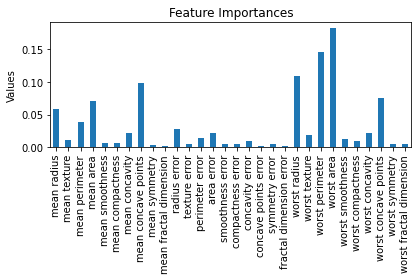

In [18]:
import pandas as pd
importances = rf.feature_importances_
forest_importances = pd.Series(importances,index=feature_names )
fig, ax = plt.subplots()
forest_importances.plot.bar()
ax.set_title("Feature Importances")
ax.set_ylabel("Values")
fig.tight_layout()

In [5]:
# evaluate using only top 10 features
selection = [f for (i,f) in feature_importance[:10]]

In [6]:
selection

['worst area',
 'worst perimeter',
 'worst radius',
 'mean concave points',
 'worst concave points',
 'mean area',
 'mean radius',
 'mean perimeter',
 'radius error',
 'mean concavity']

In [7]:
# find indexes for those features
selected_indices = [[x for x in feature_names].index(f) for f in selection]
selected_indices

[23, 22, 20, 7, 27, 3, 0, 2, 10, 6]

In [9]:
# retrieve data using the ondices

X2 = [d[selected_indices] for d in breast_cancer.data]


In [10]:
feature_names2 = breast_cancer.feature_names[selected_indices]
feature_names2

array(['worst area', 'worst perimeter', 'worst radius',
       'mean concave points', 'worst concave points', 'mean area',
       'mean radius', 'mean perimeter', 'radius error', 'mean concavity'],
      dtype='<U23')

In [12]:
# separate data into training and test sets

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size = 0.3, random_state=4) 

In [13]:
# create a decision tree classifier and train it on the data
dt = DecisionTreeClassifier()
dt.fit(X2_train, y_train)
print(dt)
print(f"Test Score: {dt.score(X2_test, y_test)}")

# predict on test data

y_dt = dt.predict(X2_test)
print(metrics.classification_report(y_test, y_dt))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Test Score: 0.9064327485380117
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        54
           1       0.95      0.91      0.93       117

    accuracy                           0.91       171
   macro avg       0.89      0.91      0.89       171
weighted avg       0.91      0.91      0.91       171

